Epoch 1/25
2/2 [==============================] - 3s 967ms/step - loss: 1.1358 - accuracy: 0.2687 - val_loss: 1.0907 - val_accuracy: 0.4118
Epoch 2/25
2/2 [==============================] - 0s 195ms/step - loss: 1.1229 - accuracy: 0.3134 - val_loss: 1.0765 - val_accuracy: 0.4706
Epoch 3/25
2/2 [==============================] - 0s 153ms/step - loss: 1.1090 - accuracy: 0.3284 - val_loss: 1.0673 - val_accuracy: 0.4118
Epoch 4/25
2/2 [==============================] - 0s 156ms/step - loss: 1.0756 - accuracy: 0.4478 - val_loss: 1.0578 - val_accuracy: 0.5294
Epoch 5/25
2/2 [==============================] - 0s 152ms/step - loss: 1.0552 - accuracy: 0.4776 - val_loss: 1.0486 - val_accuracy: 0.6471
Epoch 6/25
2/2 [==============================] - 0s 165ms/step - loss: 1.0266 - accuracy: 0.5224 - val_loss: 1.0395 - val_accuracy: 0.6471
Epoch 7/25
2/2 [==============================] - 0s 160ms/step - loss: 1.0340 - accuracy: 0.5075 - val_loss: 1.0308 - val_accuracy: 0.6471
Epoch 8/25
2/2 [====

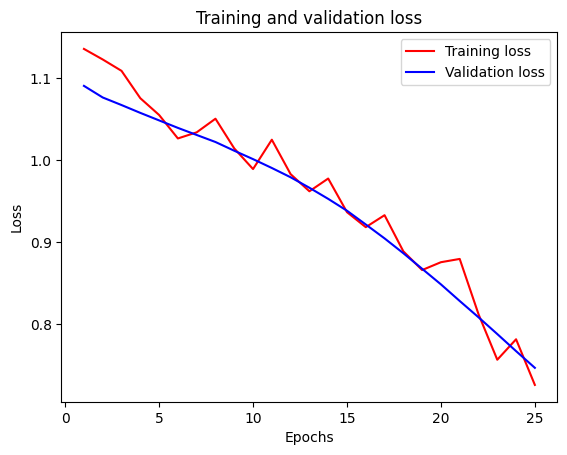

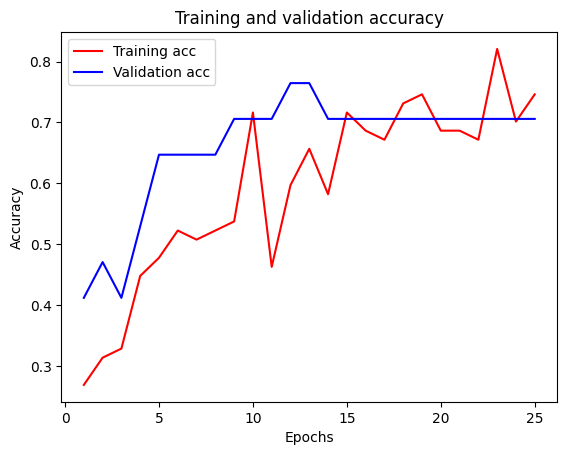

1/1 [==============================] - 0s 46ms/step - loss: 0.5467 - accuracy: 0.9524
Accuracy: 0.9523809552192688
Enter value for Rachis Length: 22
Enter value for Width/Length Ratio: 0.4
Enter value for Pair of Leaves: 13
1/1 [==============================] - 1s 795ms/step
Predicted class: 0
Predicted class: Cassia Roxburghii


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('All_data_new (1).csv')

# Shuffle the Dataset
shuffled_ds = dataset.sample(frac=1, random_state=42)

# Extract the features and the one-hot encoded target variables
X = dataset.drop(['class_0', 'class_1', 'class_2'], axis=1).values
y = dataset[['class_0', 'class_1', 'class_2']].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model with additional layers
model = Sequential([
    Dense(52, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(44, activation='relu'),
    Dense(30, activation='relu'), 
    Dropout(0.5),                  
    Dense(16, activation='relu'),  
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=34, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

# Function to get user inputs
def get_user_inputs():
    user_input = []
    feature_names = dataset.columns[:-3]  # Exclude the last 3 columns (class_0, class_1, class_2)
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))  # Ensure the input is of correct type
        user_input.append(value)
    return user_input

# Function to predict the class
def predict_class(user_input):
    # Preprocess the user input
    user_input_scaled = scaler.transform(np.array(user_input).reshape(1, -1))
    
    # Make prediction
    predicted_probabilities = model.predict(user_input_scaled)
    predicted_class = np.argmax(predicted_probabilities)
    
    return predicted_class

# Get user inputs
user_input = get_user_inputs()
predicted_class = predict_class(user_input)
print("Predicted class:", predicted_class)

# Display the predicted class and corresponding image
if predicted_class == 1:
    print("Predicted class: Senna Seamea")
elif predicted_class == 0:
    print("Predicted class: Cassia Roxburghii")
elif predicted_class == 2:
    print("Predicted class: Senna Spectabilis")
else:
    print("Not defined")